<a href="https://colab.research.google.com/github/eferrari421/Cifar-Image-Classification/blob/main/cifar_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Load up the data

In [42]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

Let's take a look at the shape of each dataset

In [43]:
print("train_x:", train_x.shape)
print("train_y:", train_y.shape)
print("test_x:", test_x.shape)
print("test_y:", test_y.shape)

train_x: (50000, 32, 32, 3)
train_y: (50000, 1)
test_x: (10000, 32, 32, 3)
test_y: (10000, 1)


Data visualisation of some of the images in the dataset

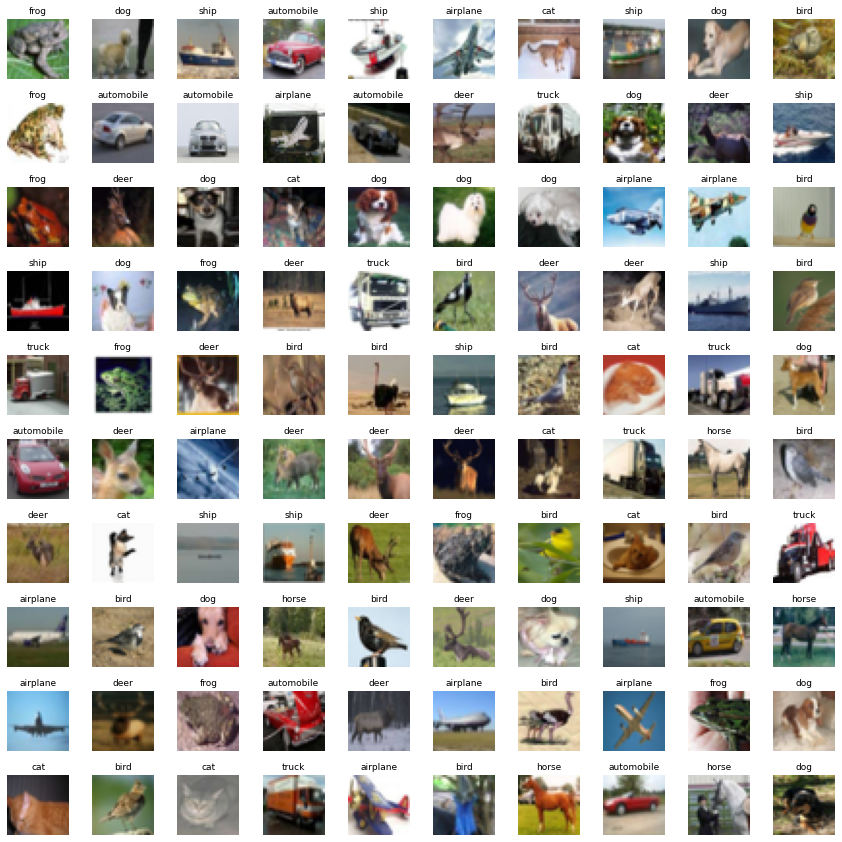

In [44]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

#we'll take a look at 100 random images
fig, axes = plt.subplots(10, 10, figsize = (15,15))

#flatten the array
axes = axes.ravel() 

for i in range(0, 100):
    # Select a random number
    index = np.random.randint(0, len(train_x))
    # read and display an image with the selected index    
    axes[i].imshow(train_x[index,1:])
    label_index = int(train_y[index])
    axes[i].set_title(labels[label_index], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Preprocessing

In [45]:
#data scaling
train_x = train_x/255
test_x = test_x/255


In [46]:
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

Model

In [54]:
model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.3),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.3),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Dropout(0.3),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=10, activation="sigmoid"),
])

In [55]:
model.build((32,32,3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)         

In [57]:
model.compile(
    optimizer=keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

Early Stopping

In [58]:

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

Data Augmentation

In [59]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_x, train_y, batch_size)
steps_per_epoch = train_x.shape[0] // batch_size

In [60]:
history = model.fit(
    train_generator,
    validation_data=(test_x, test_y),
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    callbacks=[early_stopping],
)

Epoch 1/30
1562/1562 [==============================] - 159s 102ms/step - loss: 0.4123 - binary_accuracy: 0.8639 - val_loss: 0.3427 - val_binary_accuracy: 0.9000
Epoch 2/30
1562/1562 [==============================] - 161s 103ms/step - loss: 0.3343 - binary_accuracy: 0.8999 - val_loss: 0.3117 - val_binary_accuracy: 0.8996
Epoch 3/30
1562/1562 [==============================] - 162s 104ms/step - loss: 0.3154 - binary_accuracy: 0.8999 - val_loss: 0.2911 - val_binary_accuracy: 0.8991
Epoch 4/30
1562/1562 [==============================] - 162s 103ms/step - loss: 0.3034 - binary_accuracy: 0.8995 - val_loss: 0.2809 - val_binary_accuracy: 0.9002
Epoch 5/30
1562/1562 [==============================] - 162s 104ms/step - loss: 0.2944 - binary_accuracy: 0.8998 - val_loss: 0.2818 - val_binary_accuracy: 0.9000
Epoch 6/30
1562/1562 [==============================] - 163s 104ms/step - loss: 0.2874 - binary_accuracy: 0.9001 - val_loss: 0.2684 - val_binary_accuracy: 0.9000
Epoch 7/30
1562/1562 [======

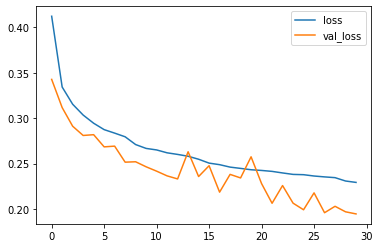

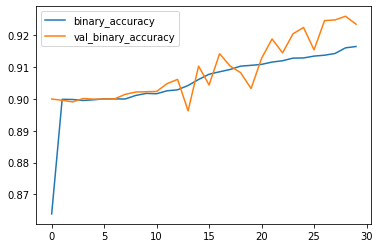

In [61]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [62]:
evaluation = model.evaluate(test_x, test_y)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 8s 24ms/step - loss: 0.1945 - binary_accuracy: 0.9236
Test Accuracy : 92.36%
